# NLP(Natural Language Processing, 자연어 처리)
- 텍스트에서 의미 있는 정보를 분석, 추출하고 이해하는 일련의 기술 집합

## KoNLPy : 파이썬 한국어 NLP 패키지
KoNLPy : "코엔엘파이"라고 읽음.
[참고](https://konlpy.org/ko/latest/#start)

### KoNLPY 설치 전 준비 사항
- 운영체제 확인
    * 시작 버튼 우클릭 --> 시스템 선택
        - **시스템 종류 : 64비트 운영 체제, x64 기반 프로세서**
- 파이썬 버전 확인
    * cmd 창에서 ```python --version```
        - **Python 3.10.8**
        
운영체제 비트 수와 파이썬 비트 수가 일치해야함.

In [2]:
# 설치된 python이 몇 bit 버전인지 확인하는 코드
import platform
print( platform.architecture() )

('64bit', 'WindowsPE')


- Java 버전 확인(1.7 이상이어야 함.)
    * cmd 창에서 ``javac -version```
        - **javac 11.0.11** 
        - 설치 필요할 때 [여기 클릭](https://www.oracle.com/java/technologies/downloads/#jdk19-windows)  
          이참에 최신 버전으로 하나 설치하죠.
- 환경 변수 등록(ppt 참고)
- JPype 설치(ppt 참고)

In [3]:
from konlpy.tag import Kkma

In [4]:
kkma = Kkma()

In [5]:
# 문장 구분, 분리
print(kkma.sentences('한글 분석을 시작합니다. 잘 되겠죠?'))

['한글 분석을 시작합니다.', '잘 되겠죠?']


In [6]:
# 명사 구분, 분리
print(kkma.nouns('한글 분석을 시작합니다. 잘 되겠죠?'))

['한글', '분석']


In [7]:
print(kkma.pos('한글 분석을 시작합니다. 잘 되겠죠?'))

[('한글', 'NNG'), ('분석', 'NNG'), ('을', 'JKO'), ('시작하', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF'), ('잘', 'MAG'), ('되', 'VV'), ('겠', 'EPT'), ('죠', 'EFN'), ('?', 'SF')]


In [8]:
from konlpy.tag import Hannanum
hunnanum = Hannanum()

In [10]:
# 문장 구분, 분리
print(hunnanum.nouns('한글 분석을 시작합니다. 잘 되겠죠?'))

['한글', '분석', '시작']


In [11]:
print(hunnanum.morphs('한글 분석을 시작합니다. 잘 되겠죠?'))

['한글', '분석', '을', '시작', '하', 'ㅂ니다', '.', '잘', '되', '겠죠', '?']


In [12]:
print(hunnanum.pos('한글 분석을 시작합니다. 잘 되겠죠?'))

[('한글', 'N'), ('분석', 'N'), ('을', 'J'), ('시작', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('.', 'S'), ('잘', 'M'), ('되', 'P'), ('겠죠', 'E'), ('?', 'S')]


In [13]:
from konlpy.tag import Okt
t = Okt()

['한글', '분석', '시작']
['한글', '분석', '을', '시작', '합니다', '.', '잘', '되겠죠', '?']


In [15]:
print(t.nouns('한글 분석을 시작합니다. 잘 되겠죠?'))
print(t.morphs('한글 분석을 시작합니다. 잘 되겠죠?'))
print(t.pos('한글 분석을 시작합니다. 잘 되겠죠?'))

['한글', '분석', '시작']
['한글', '분석', '을', '시작', '합니다', '.', '잘', '되겠죠', '?']
[('한글', 'Noun'), ('분석', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('잘', 'Verb'), ('되겠죠', 'Verb'), ('?', 'Punctuation')]


## NLTK(Natural Language Toolkit)
- NLTK : 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지  
- **말뭉치(corpus)** : 자연어 분석 작업을 위해 만든 샘플 문서 집함
    * 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사, 형태소 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함.
    * NLTK의 말뭉치 자료는 설치시 제공되지 않고 download 명령어 사용자가 다운로드 받아야 함.
    
[참고 사이트](https://mangastorytelling.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%8A%A4%EC%BF%A8-ml31-NLTK-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-%ED%8C%A8%ED%82%A4%EC%A7%80)

NLTK 설치

In [16]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 1.8 MB/s eta 0:00:00


In [26]:
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.corpus import kobill

from matplotlib import font_manager , rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [27]:
doc = kobill.open('1809890.txt').read()
t = Okt()
tokens = t.nouns(doc)

ko = nltk.Text(tokens, name='대한민국 국회 의안 제 1809890호')
# number of tokens
print( len(ko.tokens) )

# number of unique tokens
print( len( set(ko.tokens) ) )

735
250


In [28]:
# frequency distribution, ko.tokens.count('육아휴직')
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

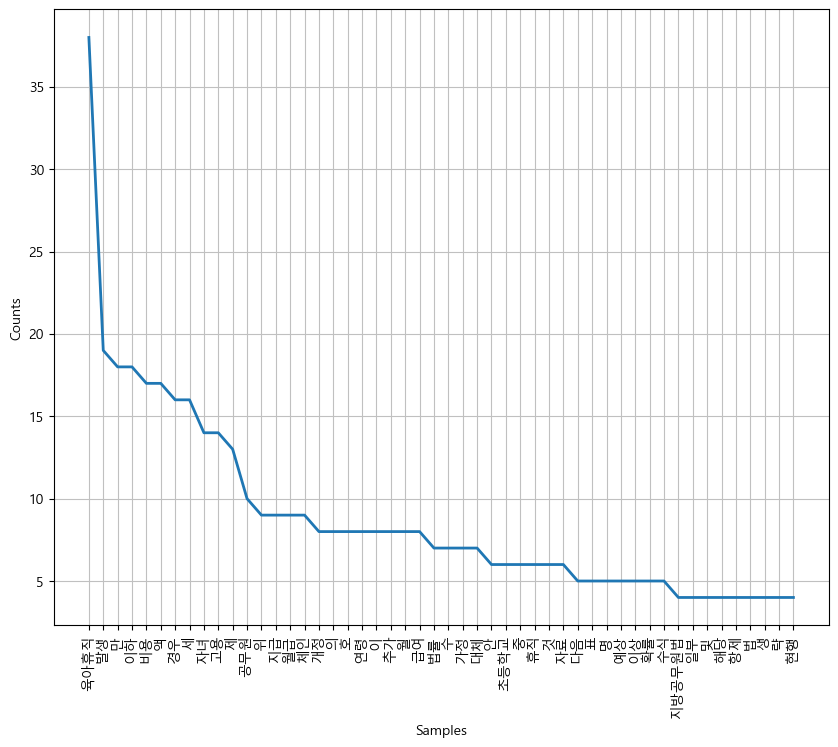

In [29]:
plt.figure(figsize=(10,8))
ko.plot(50)
plt.show()

In [38]:
stop_words = ['.', '(', ')', ',', '의', '자', '에', '안', '번', '호', '을', '이', '다', '및', '명', '것', '중', '안', '위', '만', '액', '제', '표']

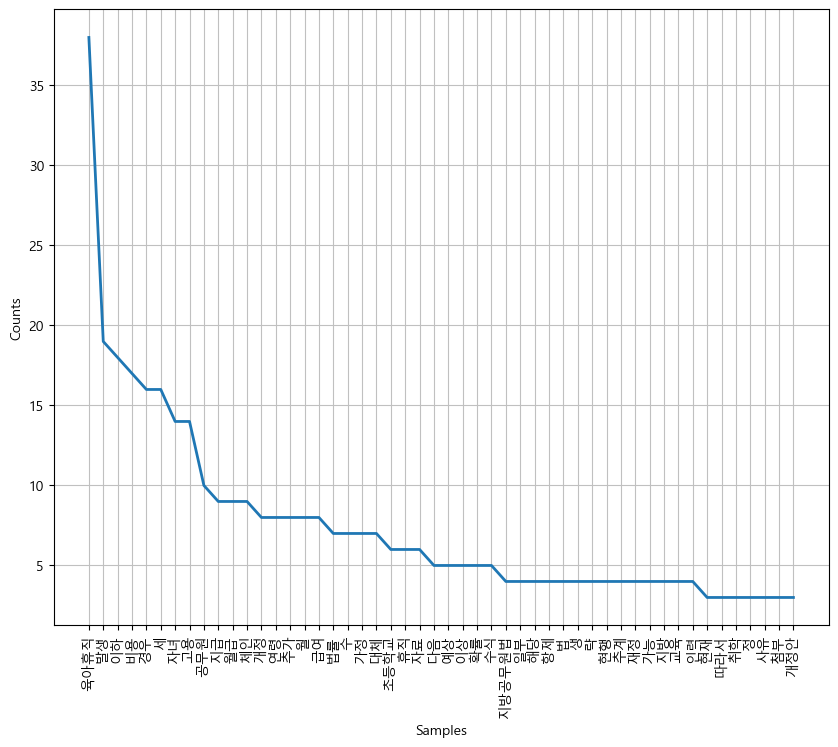

In [39]:
ko = [each_word for each_word in ko if each_word not in stop_words]
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')
plt.figure(figsize=(10,8))
ko.plot(50)
plt.show()